In [33]:
print("Playground notebook")

Playground notebook


In [34]:
%notebook inline

In [35]:
from pymatgen.electronic_structure.boltztrap2 import *
from monty.serialization import loadfn
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.plotter import DosPlotter

In [112]:
# deviation from Fermi energy in eV
energy_range = 1.5
temps = [300, 600, 900, 1200]
dopings = [1e16,1e20]
doping_type = 'p'

save_to_disk = True
load_from_disk = not save_to_disk

In [37]:
vrun = Vasprun('vasprun.xml',parse_projected_eigen=True)
data = VasprunBSLoader(vrun)

In [114]:
# set curvature=False to speed up in case you do not need effective mass or hall coeficients
bztInterp = BztInterpolator(data,lpfac=10,energy_range=energy_range,curvature=True,save_bztInterp=save_to_disk, load_bztInterp=load_from_disk, fname='bztInterp.json.gz')

# Compute and plot the band structure on standard symmetry path

In [88]:
# sbs = bztInterp.get_band_structure()
# list(sbs.bands.values())[0].shape
# BSPlotter(sbs).show(ylim=[-energy_range, energy_range])

# On a specific kpoint path

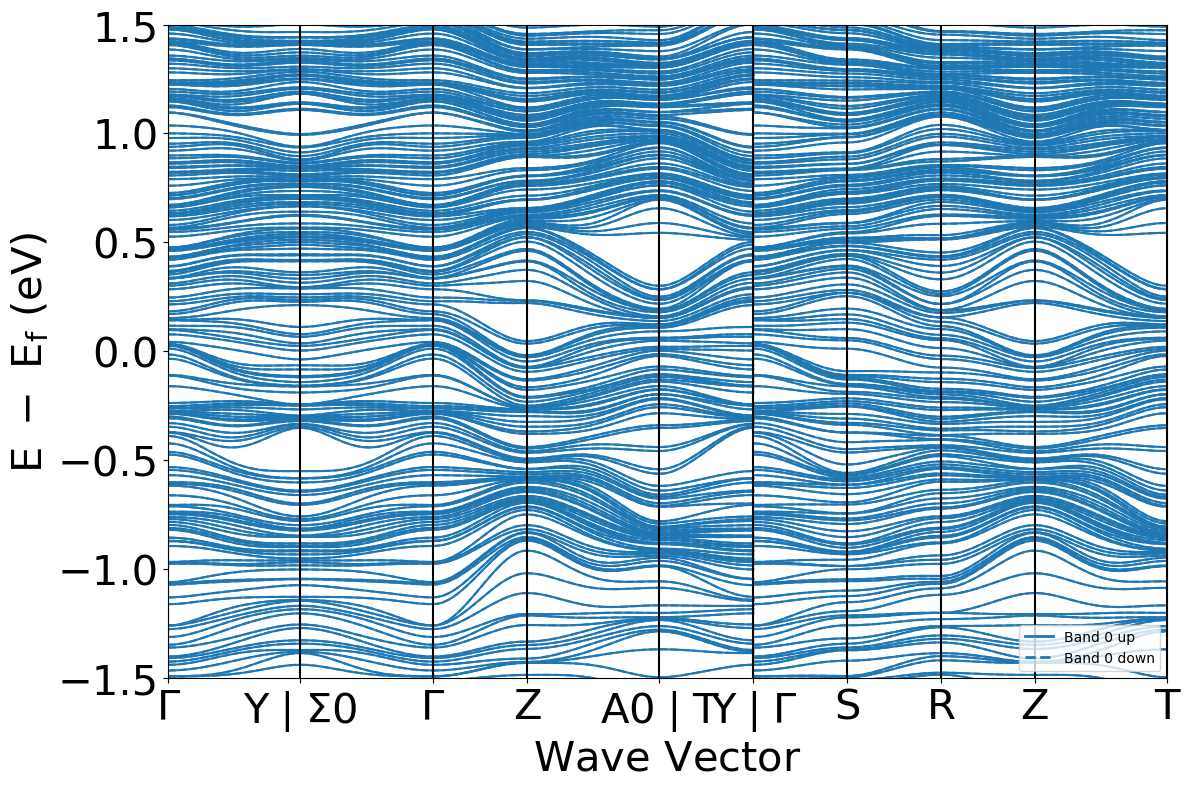

In [65]:
kpaths = [["Γ", "Y", "C0"], ["Σ0", "Γ", "Z", "A0"], ["E0", "T", "Y"], ["Γ", "S", "R", "Z", "T"]]

kp_lbl = {"A0":np.array([0.5000000000, 0.5000000000, 0.5000000000]),
          "A0'":np.array([-0.5000000000, -0.5000000000, -0.5000000000]),
          "C0":np.array([-0.5000000000, 0.5000000000, 0.0000000000]),
          "C0'":np.array([0.5000000000, -0.5000000000, -0.0000000000]),
          "E0":np.array([-0.5000000000, 0.5000000000, 0.5000000000]),
          "E0'":np.array([0.5000000000, -0.5000000000, -0.5000000000]),
          "Γ":np.array([0.0000000000, 0.0000000000, 0.0000000000]),
          "R":np.array([0.0000000000, 0.5000000000, 0.5000000000]),
          "R'":np.array([-0.0000000000, -0.5000000000, -0.5000000000]),
          "S":np.array([0.0000000000, 0.5000000000, 0.0000000000]),
          "S'":np.array([-0.0000000000, -0.5000000000, -0.0000000000]),
          "Σ0":np.array([0.5000000000, 0.5000000000, 0.0000000000]),
          "Σ0'":np.array([-0.5000000000, -0.5000000000, -0.0000000000]),
          "T":np.array([-0.5000000000, 0.5000000000, 0.5000000000]),
          "T'":np.array([0.5000000000, -0.5000000000, -0.5000000000]),
          "Y":np.array([-0.5000000000, 0.5000000000, 0.0000000000]),
          "Y'":np.array([0.5000000000, -0.5000000000, -0.0000000000]),
          "Z":np.array([0.0000000000, 0.0000000000, 0.5000000000]),
          "Z'":np.array([-0.0000000000, -0.0000000000, -0.5000000000]),
          }
sbs = bztInterp.get_band_structure(kpaths,kp_lbl)
BSPlotter(sbs).show(ylim=[-energy_range, energy_range])

# Compute and plot Dos

In [45]:
tot_dos = bztInterp.get_dos()
len(tot_dos.energies)

10000

In [46]:
# set progress=True to show a progress bar
tot_proj_dos = bztInterp.get_dos(partial_dos=True, progress=True)

3200it [26:30,  2.01it/s]                                                       


In [47]:
len(tot_proj_dos.get_spd_dos().values())

3

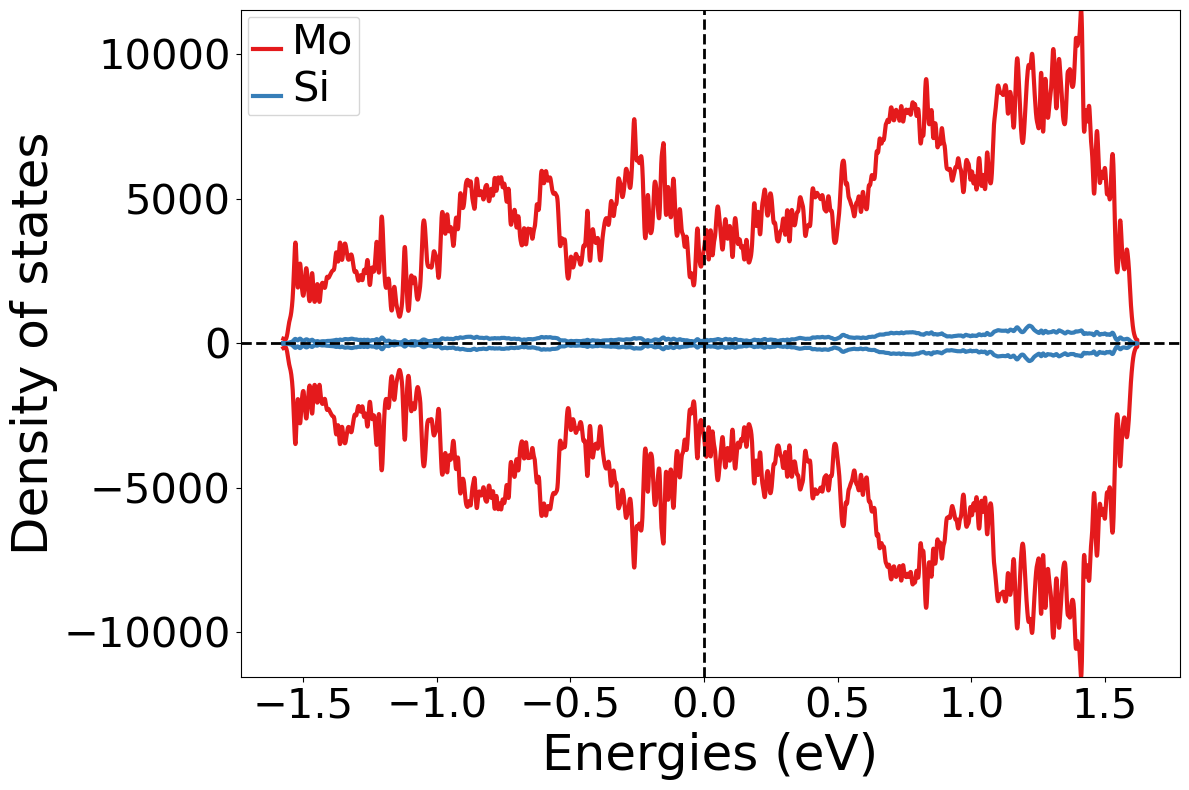

In [72]:
pltdos = DosPlotter(sigma=0.004)
pltdos.add_dos_dict(tot_proj_dos.get_element_dos())
pltdos.show()

# Transport Properties

In [49]:
bztTransp = BztTransportProperties(bztInterp, temp_r=temps, doping=dopings, save_bztTranspProps=save_to_disk, load_bztTranspProps=load_from_disk, fname='bztTranspProps.json.gz')

In [50]:
print('\t'.join(['Temp', '\mu', 'rows', 'columns tensor']))
for p in bztTransp.Conductivity_mu, bztTransp.Seebeck_mu, bztTransp.Kappa_mu, \
         bztTransp.Effective_mass_mu, bztTransp.Power_Factor_mu, bztTransp.Carrier_conc_mu:
    print('\t'.join([str(i) for i in p.shape]))

Temp	\mu	rows	columns tensor
4	1670	3	3
4	1670	3	3
4	1670	3	3
4	1670	3	3
4	1670	3	3
4	1670


In [51]:
bztTransp.compute_properties_doping(doping=dopings)

In [102]:
print('\t'.join(['Temp', 'Doping', 'rows', 'columns tensor']))
for p in bztTransp.Conductivity_doping, bztTransp.Seebeck_doping, bztTransp.Kappa_doping, \
         bztTransp.Carriers_conc_doping,bztTransp.Effective_mass_doping, bztTransp.Power_Factor_doping:
    print('\t'.join([str(i) for i in p[doping_type].shape]))

Temp	Doping	rows	columns tensor
4	7	3	3
4	7	3	3
4	7	3	3
4	7
4	7	3	3
4	7	3	3


# Plots!

In [53]:
bztPlotter = BztPlotter(bztTransp,bztInterp)

<module 'matplotlib.pyplot' from '/Users/max/opt/anaconda3/envs/boltztrap2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

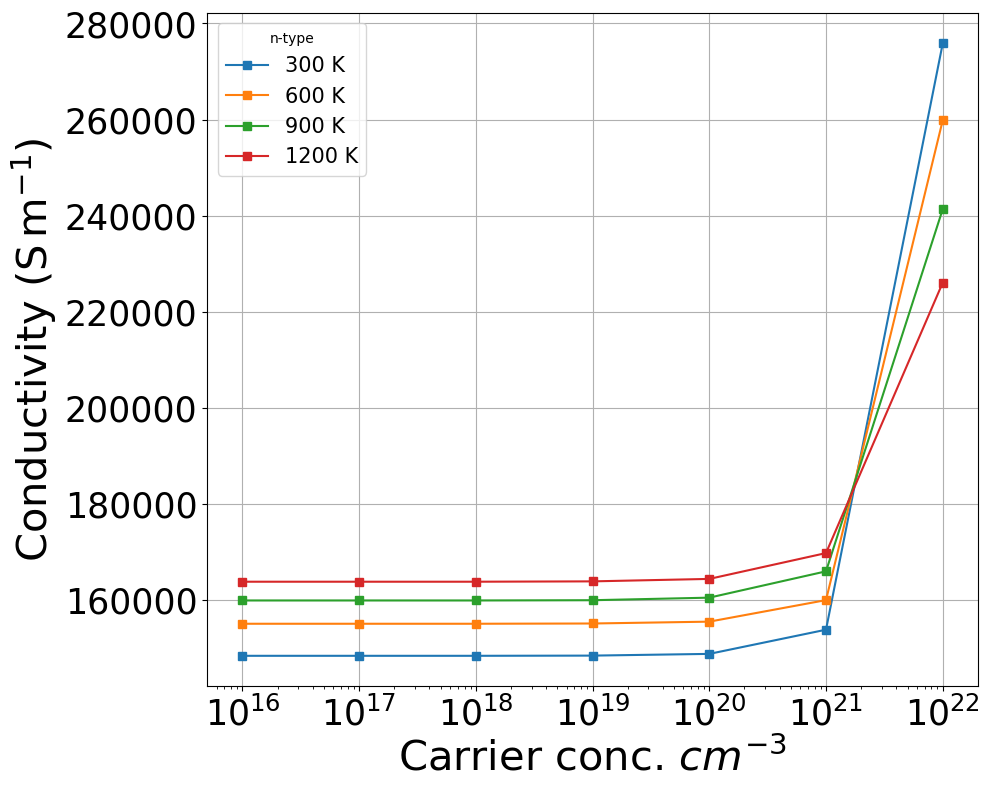

In [99]:
bztPlotter.plot_props('C','doping','temp',temps=temps)

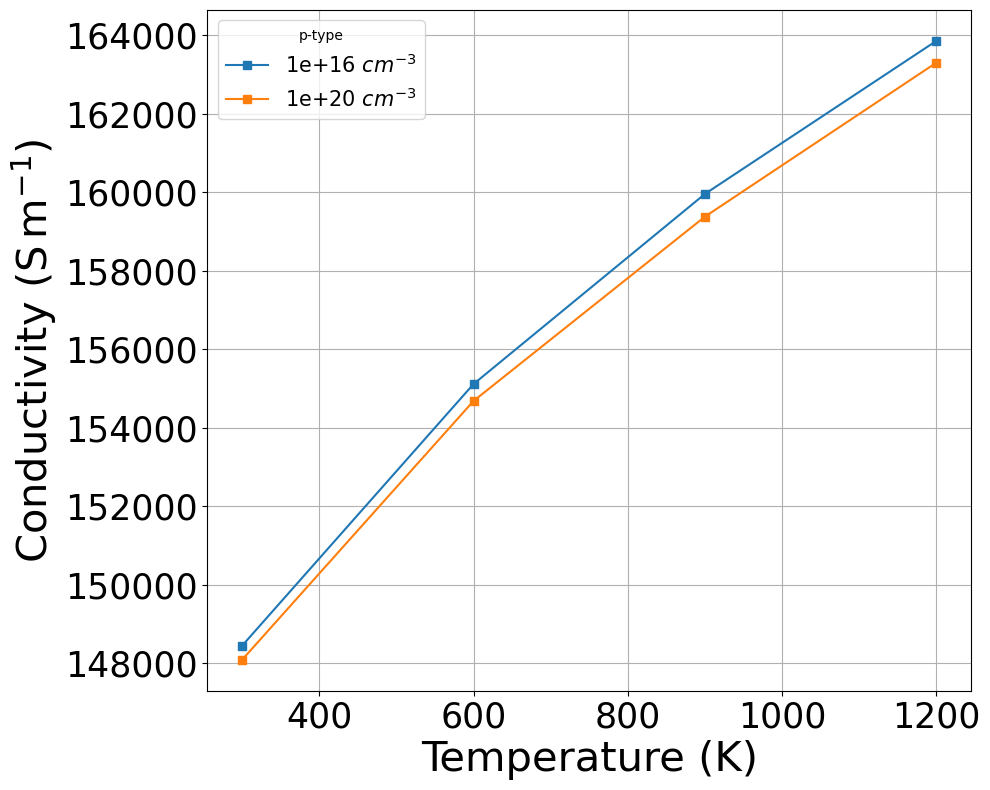

In [103]:
bztPlotter.plot_props('C','temp','doping',doping=dopings, dop_type=doping_type).show()

<module 'matplotlib.pyplot' from '/Users/max/opt/anaconda3/envs/boltztrap2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

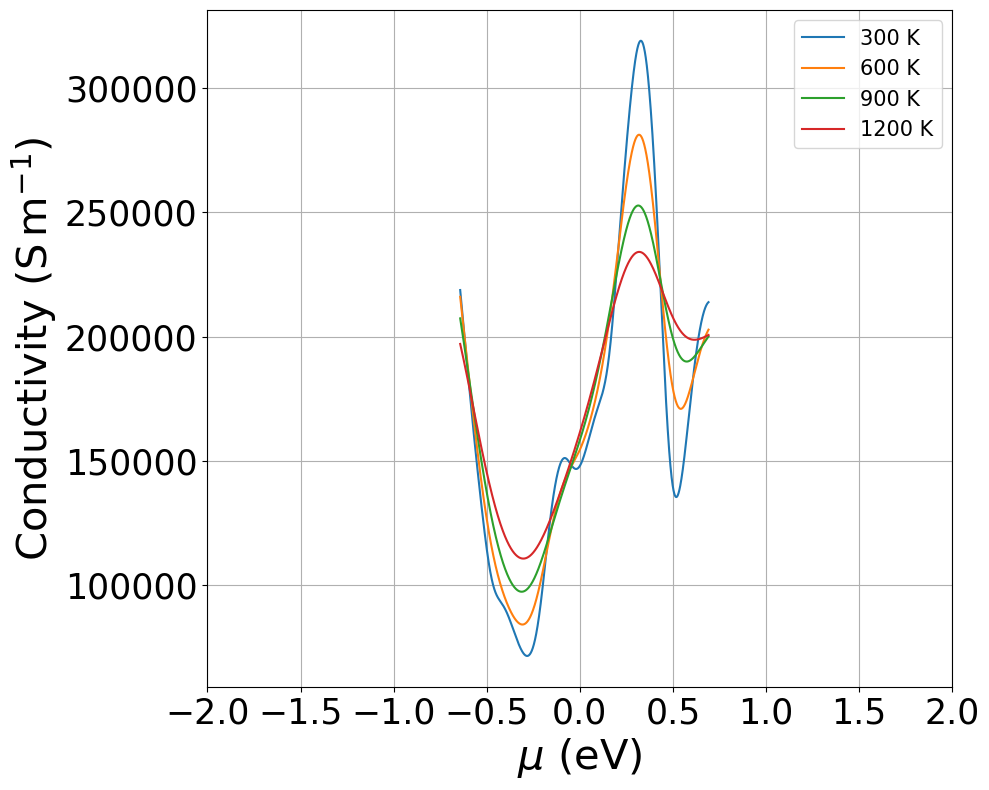

In [98]:
bztPlotter.plot_props('C','mu','temp',temps=temps)

<module 'matplotlib.pyplot' from '/Users/max/opt/anaconda3/envs/boltztrap2/lib/python3.9/site-packages/matplotlib/pyplot.py'>

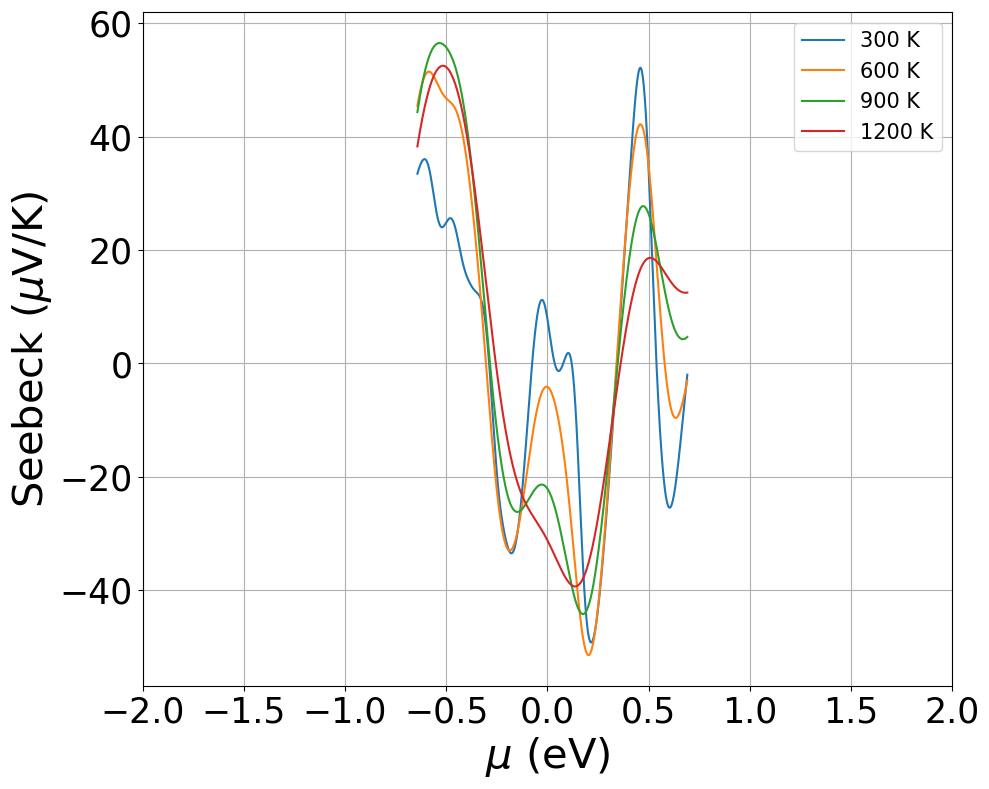

In [92]:
bztPlotter.plot_props('S','mu','temp',temps=temps)

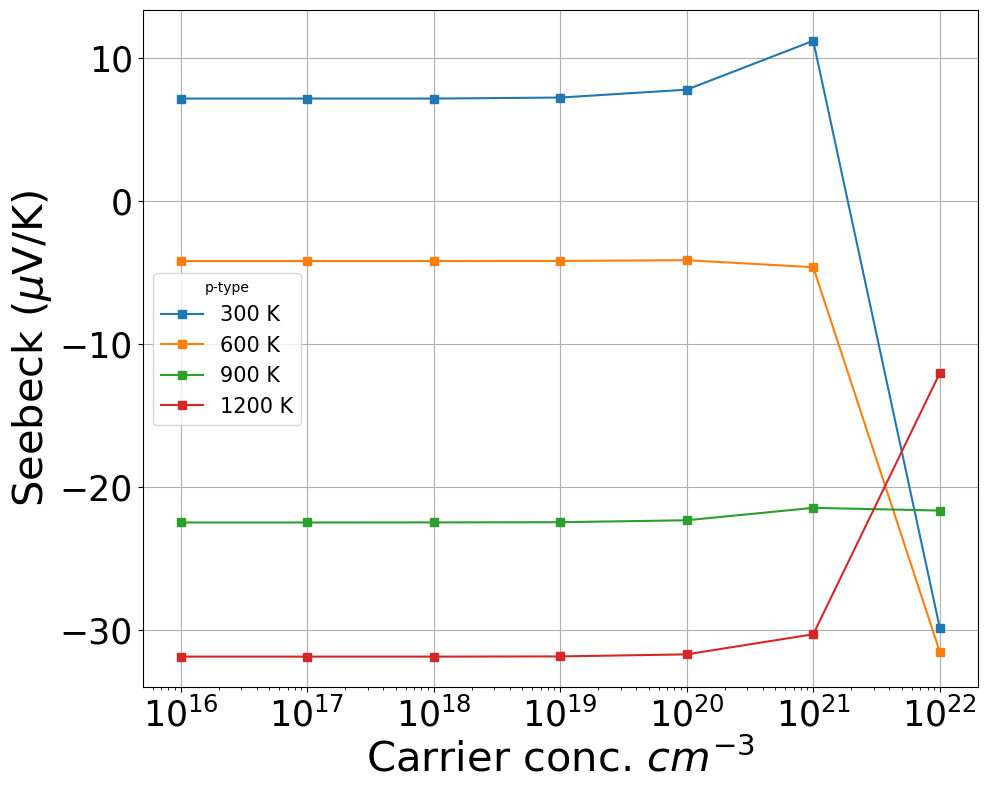

In [104]:
bztPlotter.plot_props('S','doping','temp', temps=temps, dop_type=doping_type).show()

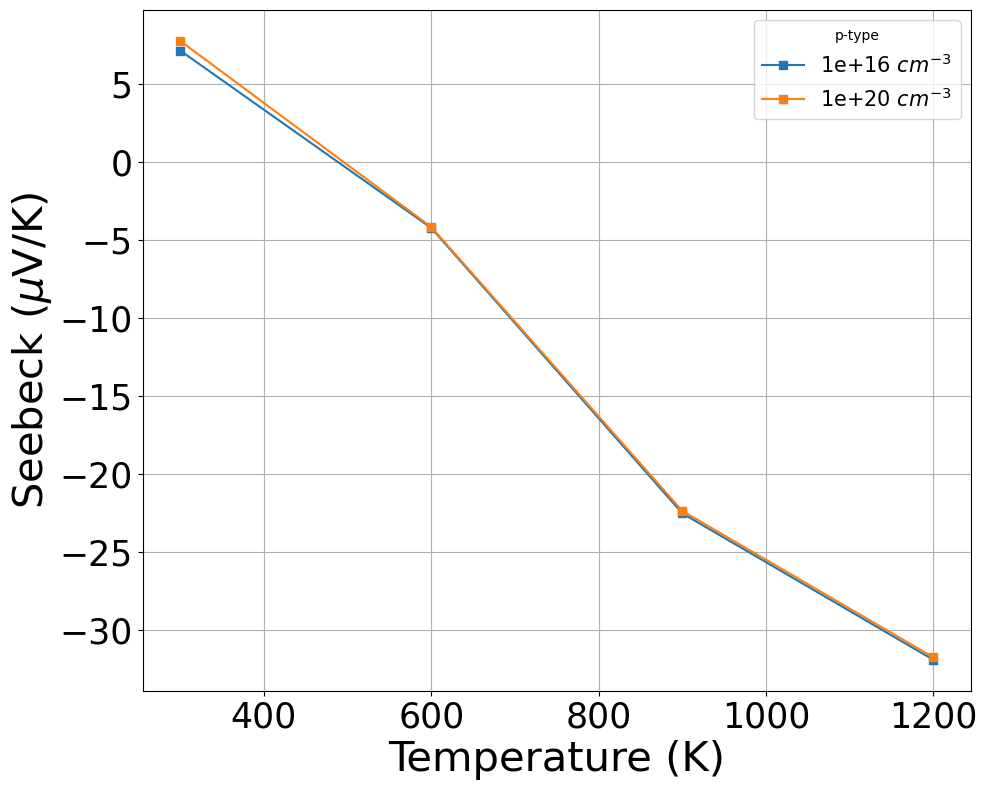

In [105]:
bztPlotter.plot_props('S','temp','doping',doping=dopings, dop_type=doping_type).show()

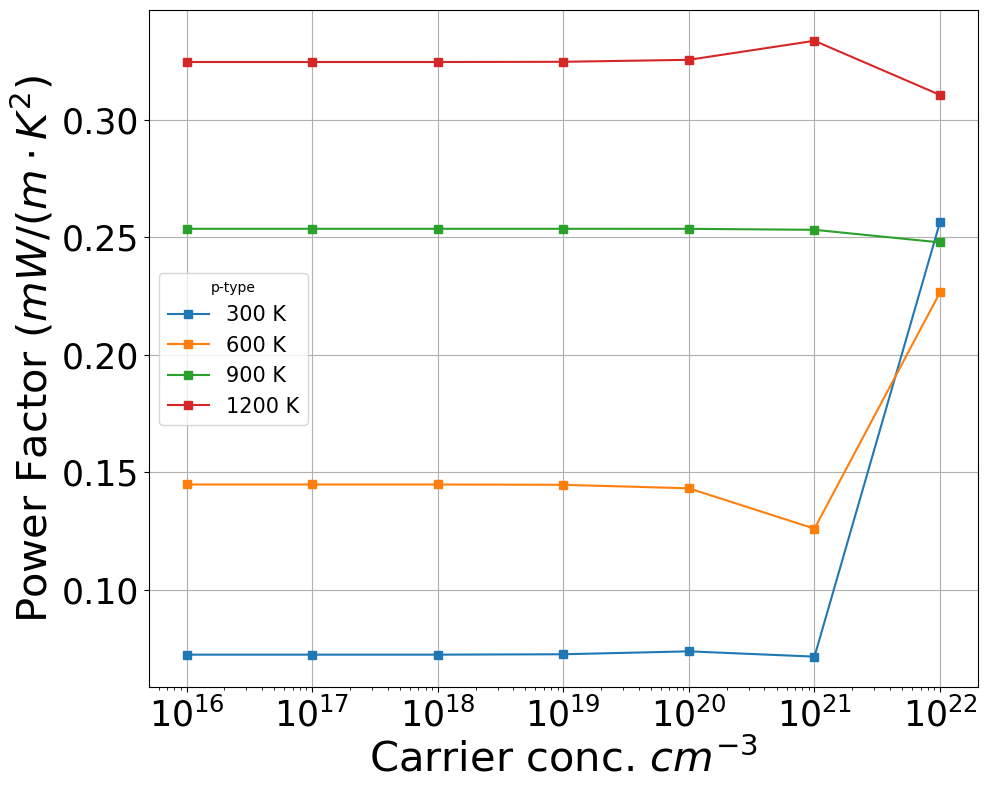

In [106]:
bztPlotter.plot_props('Po','doping','temp',temps=temps,dop_type=doping_type).show()

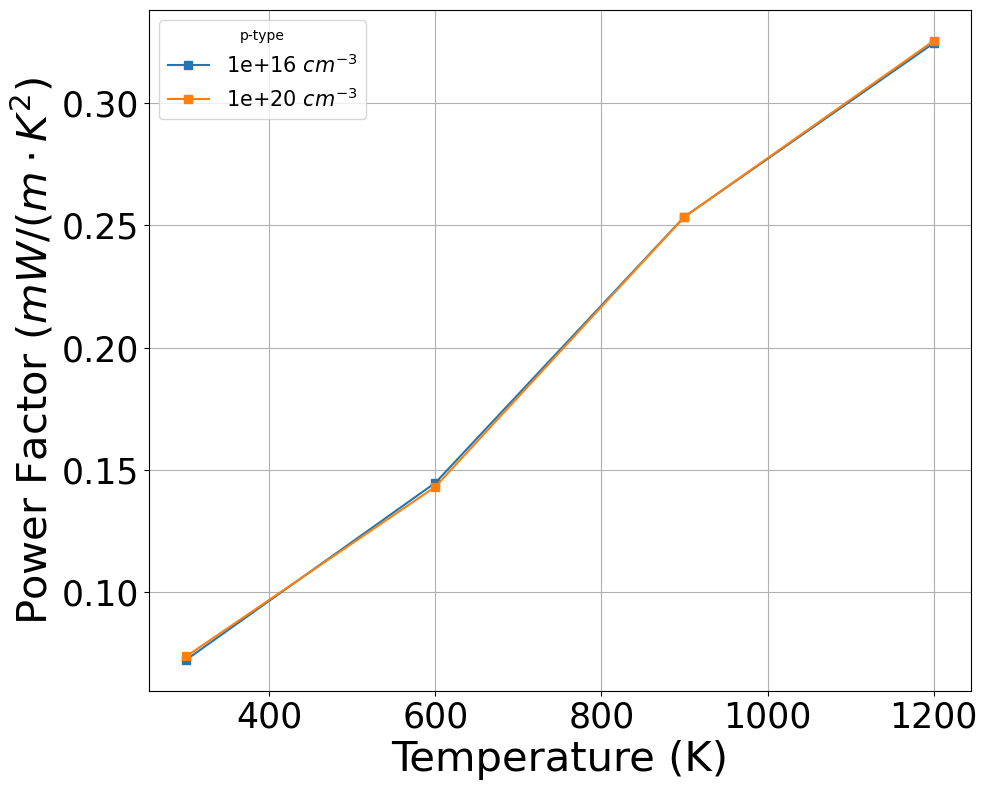

In [107]:
bztPlotter.plot_props('Po','temp','doping',doping=dopings, dop_type=doping_type).show()

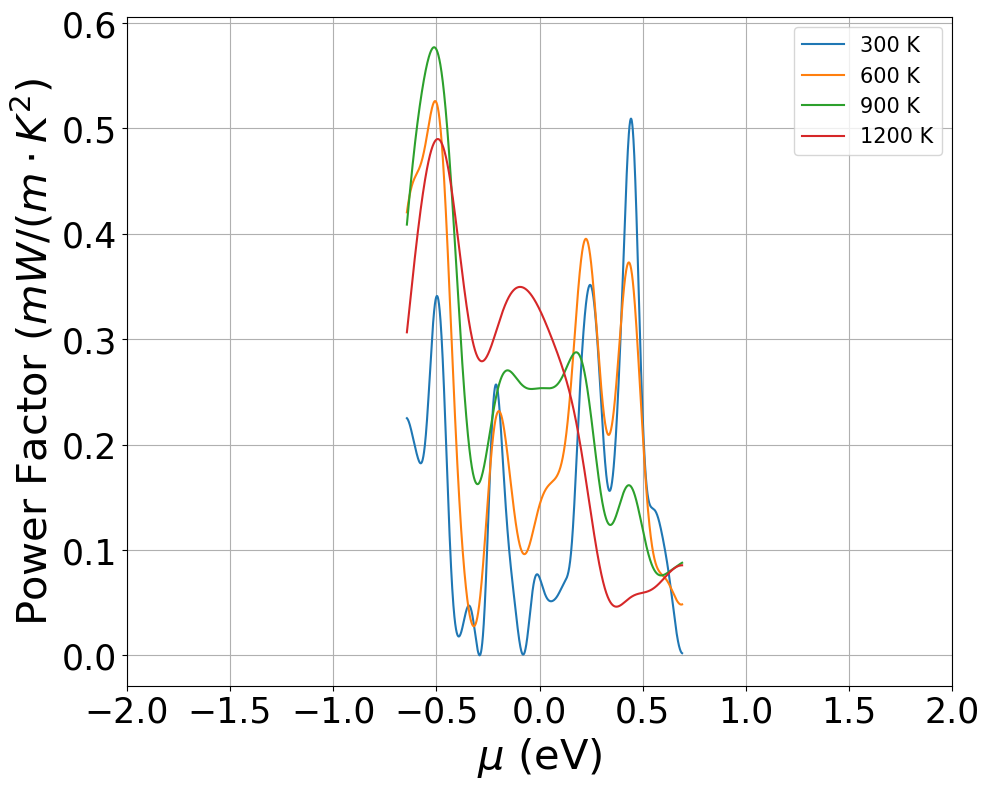

In [108]:
bztPlotter.plot_props('Po','mu','temp',temps=temps,dop_type=doping_type).show()

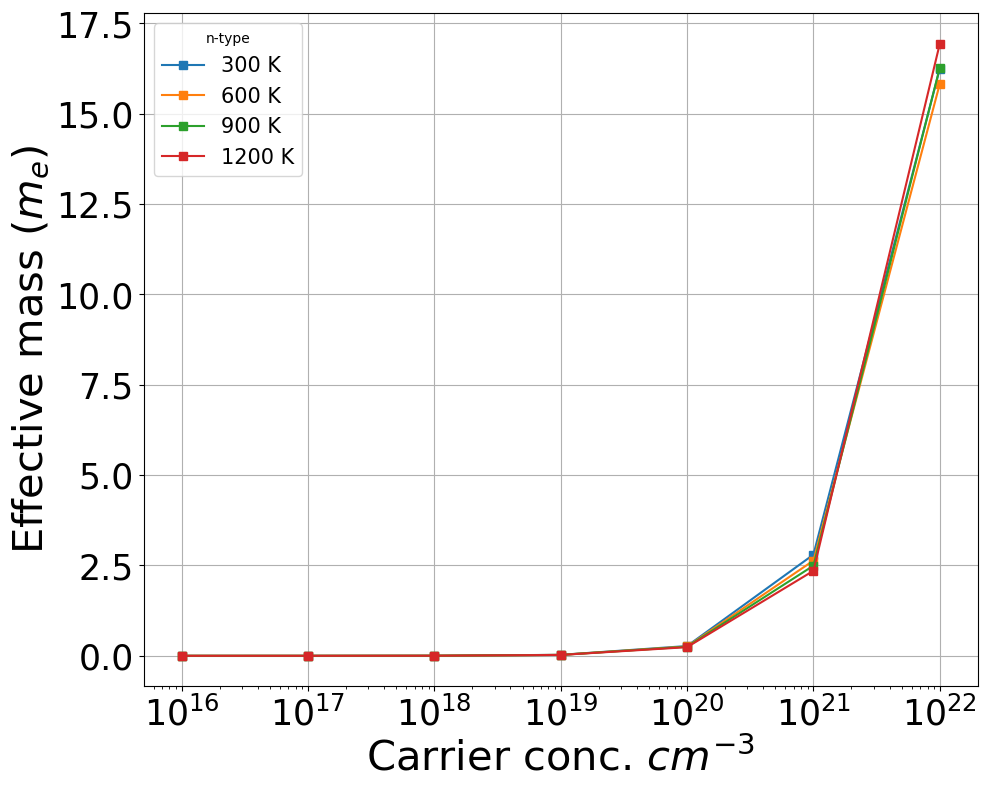

In [96]:
bztPlotter.plot_props('E','doping','temp',temps=temps).show()

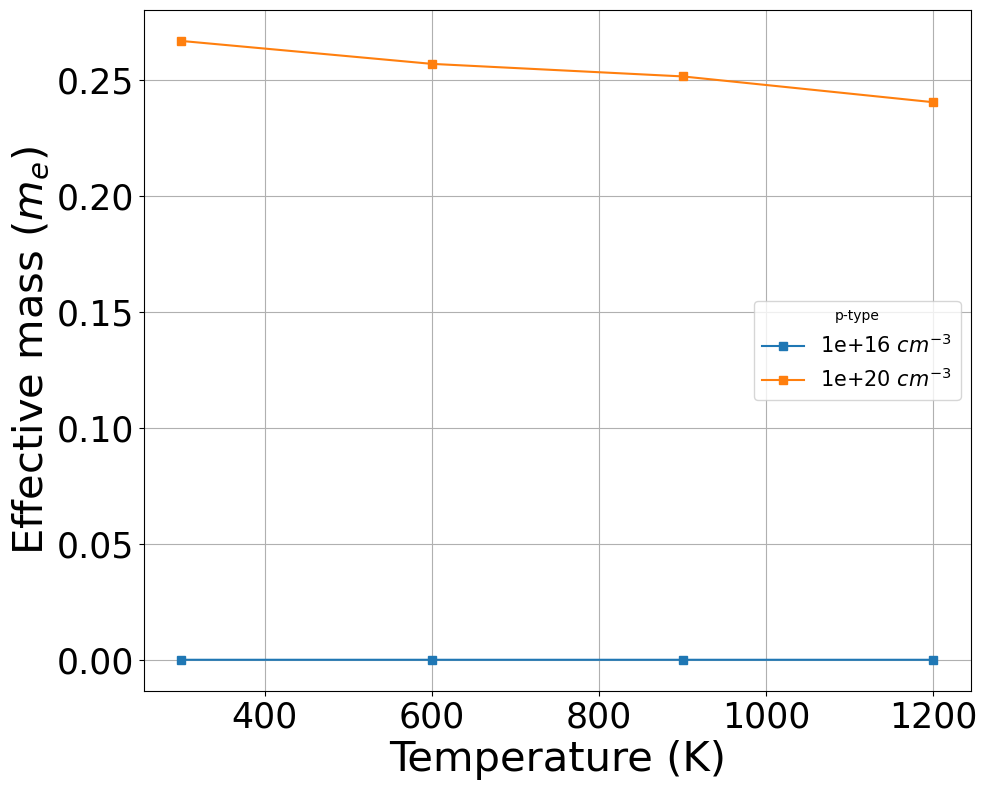

In [109]:
bztPlotter.plot_props('E','temp','doping',doping=dopings, dop_type=doping_type).show()

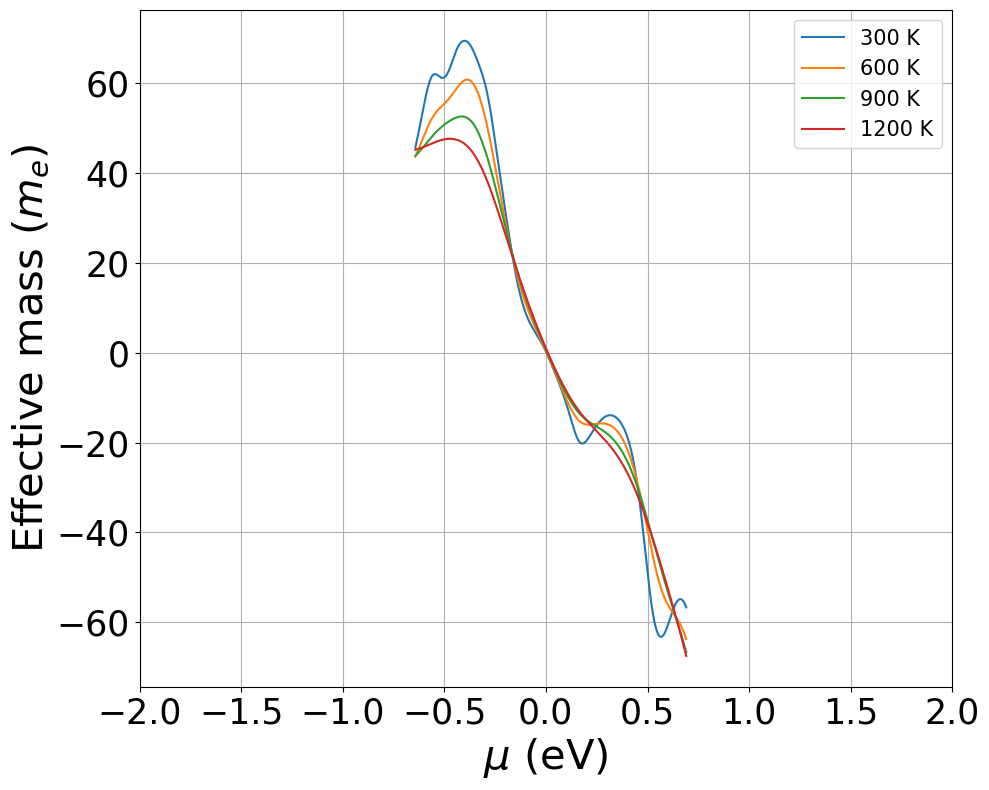

In [97]:
bztPlotter.plot_props('E','mu','temp',temps=temps).show()

# Misc things

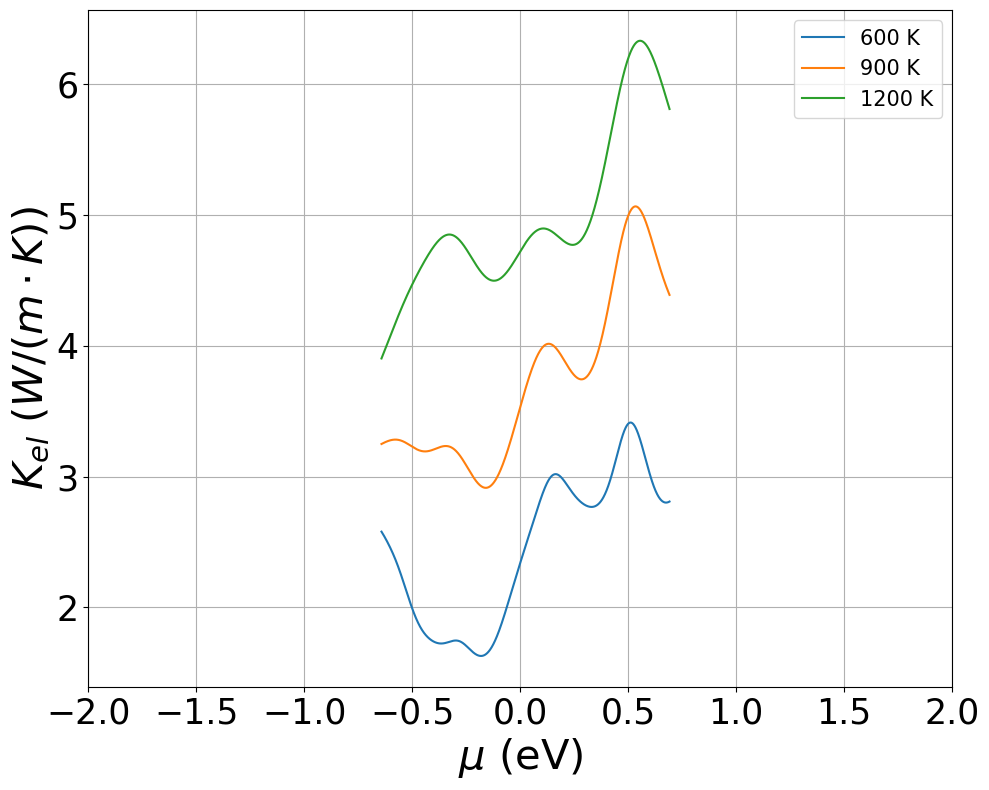

In [86]:
bztPlotter.plot_props('K','mu','temp',temps=[600,900,1200]).show()

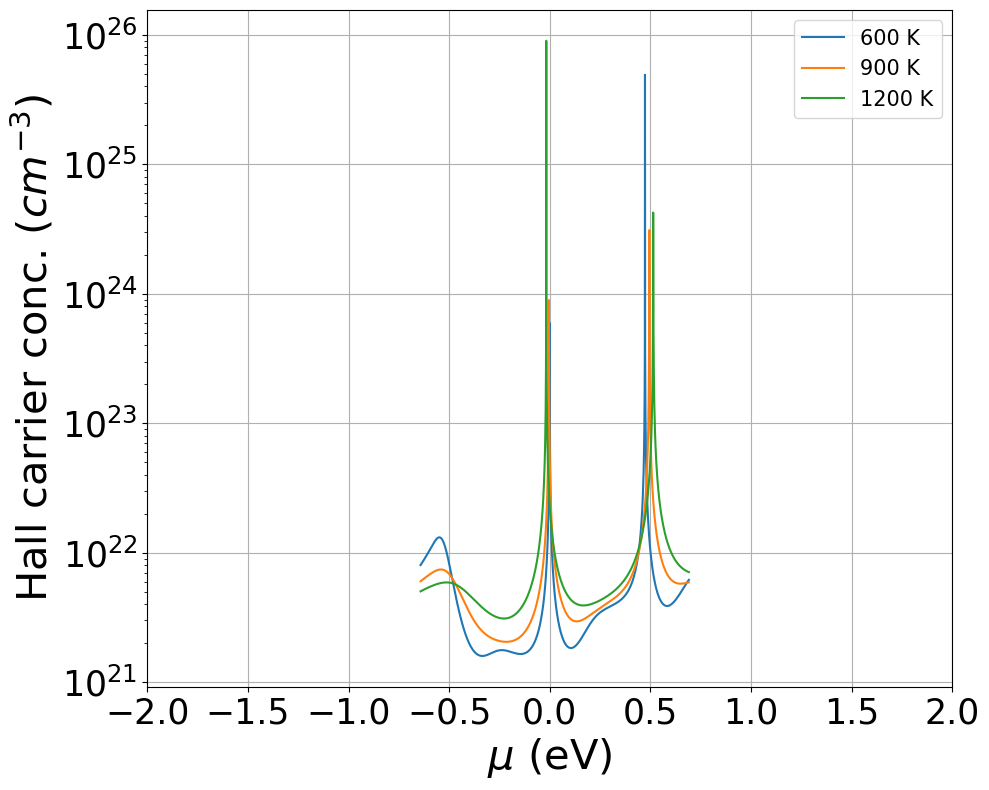

In [59]:
bztPlotter.plot_props('H','mu','temp',temps=[600,900,1200]).show()

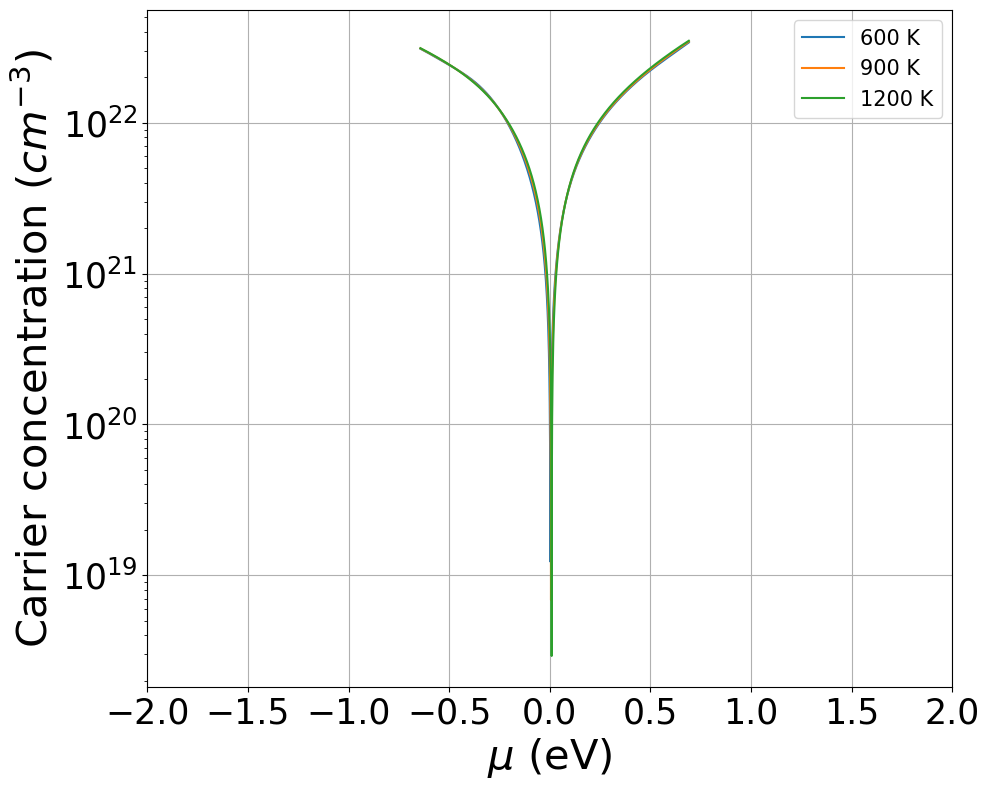

In [62]:
bztPlotter.plot_props('Ca','mu','temp',temps=[600,900,1200]).show()

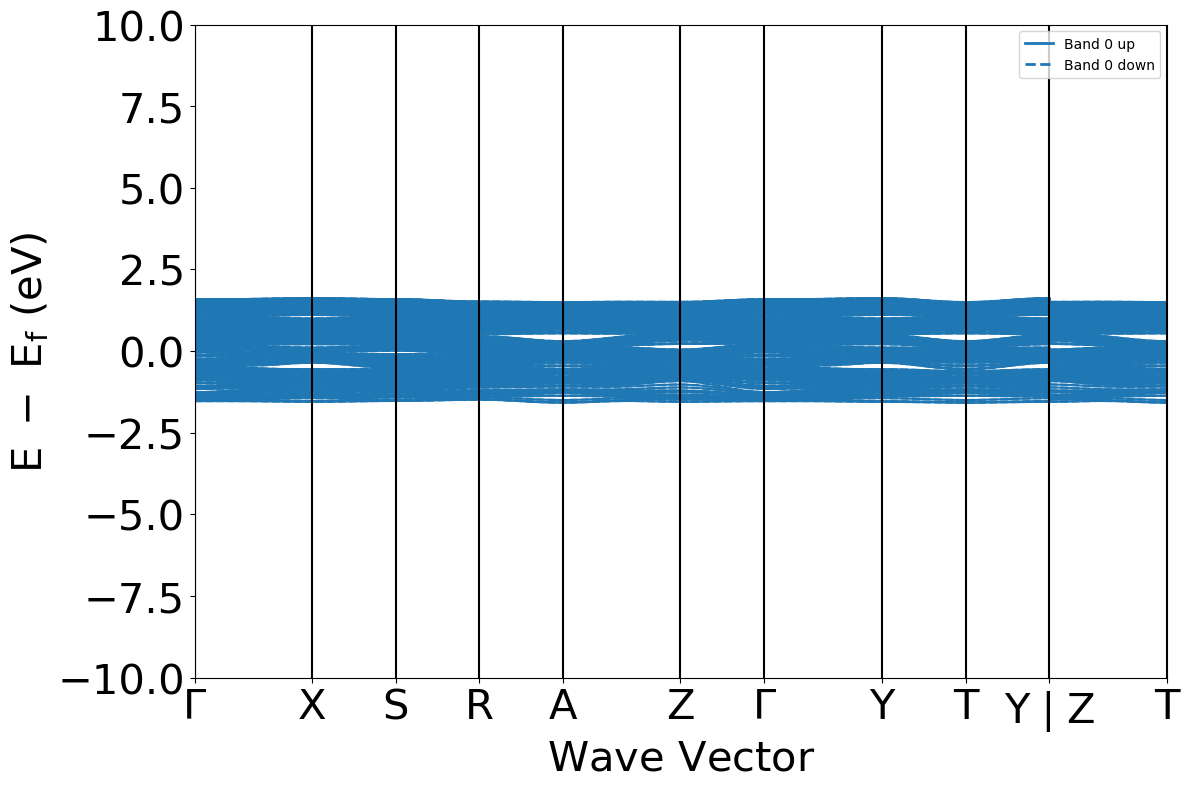

In [63]:
bztPlotter.plot_bands().show()

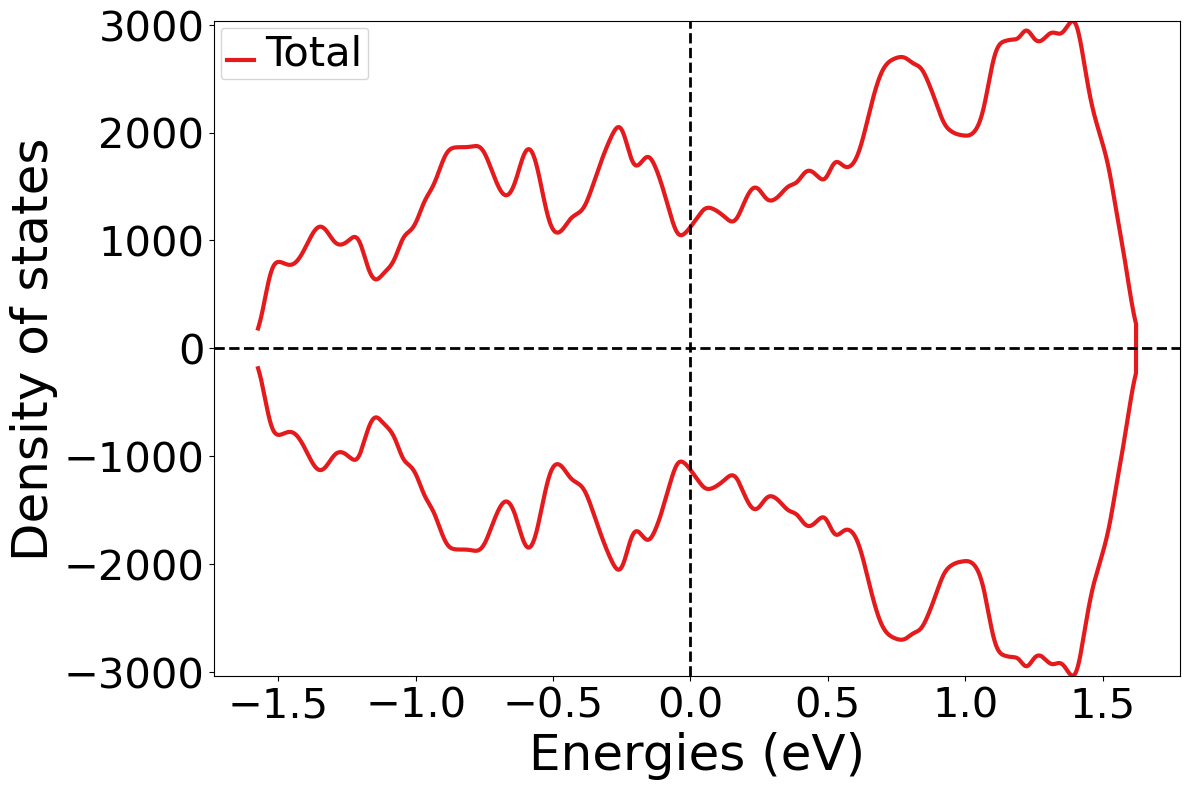

In [64]:
bztPlotter.plot_dos(T=200).show()